<a href="https://colab.research.google.com/github/spros1/Methods-and-Algorithms_Work_Semester_21-22/blob/main/Meteorological_Measurements_AthensCenter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Forecast models for meteorological measurements from Center of Athens

###We are going to work with two datasets :
|Train dataset period |Test Dataset|
----------------------|------------|
|   2009 - 2016       | 2017       |

<br>

###Both datasets fields stracture it is the same : <br>

1. Month of the Year (1, 2, . . . , 12) as month
2. Maximum Temperature Value as maxtemp
3. Minimum Temperature Value as mintemp
4. Degree heating days       as heatdegree
5. Degree of cooling days    as cooldegree
6. Rainfall Height           as rainheight
7. Average Wind Speed        as avgwindspeed
8. Max Wind Speed            as mazwindspeed




In [2]:
## Upload files - Run the same cell twice to upload both athens_09_16 and athens_2017 files
import pandas as pd
import io

from google.colab import files
uploaded = files.upload()

Saving athens_2017.dat to athens_2017.dat


In [82]:
## put data of both files into dataframes
df_09_16 = pd.read_csv("athens_09-16.dat", header=None, sep = ' ', names=["month", "maxtemp", "mintemp", "heatdegree","cooldegree","rainheight","avgwindspeed","mazwindspeed"])
df_17    = pd.read_csv("athens_2017.dat" , header=None, sep = ' ', names=["month", "maxtemp", "mintemp", "heatdegree","cooldegree","rainheight","avgwindspeed","mazwindspeed"])


df_17.shape

(365, 8)

# Check values for both files
First for athens_09-16.dat

In [83]:
## imports for data investigations
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [84]:
# total rows and columns
df_09_16.shape

(2442, 8)

In [85]:
## check values
df_09_16.head()

,month,maxtemp,mintemp,heatdegree,cooldegree,rainheight,avgwindspeed,mazwindspeed
0,1.0,16.5,11.3,4.4,0.0,0.0,2.4,32.2
1,10.0,25.3,16.6,0.3,2.7,0.0,1.4,16.1
2,12.0,15.8,4.2,8.3,0.0,3.4,1.6,24.1
3,12.0,11.2,5.8,9.0,0.0,0.0,7.7,38.6
4,5.0,23.6,18.2,0.0,1.7,0.0,8.4,37.0


In [86]:
df_09_16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2442 entries, 0 to 2441
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   month         2442 non-null   float64
 1   maxtemp       2442 non-null   float64
 2   mintemp       2442 non-null   float64
 3   heatdegree    2442 non-null   float64
 4   cooldegree    2442 non-null   float64
 5   rainheight    2442 non-null   float64
 6   avgwindspeed  2442 non-null   float64
 7   mazwindspeed  2442 non-null   float64
dtypes: float64(8)
memory usage: 152.8 KB


In [87]:
# ckeck statistics
df_09_16.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
month,2442.0,6.594595,3.428837,1.0,4.0,7.0,10.000,12.0
maxtemp,2442.0,23.439476,7.660457,5.0,17.4,23.0,30.200,39.8
mintemp,2442.0,15.893857,6.809994,0.4,10.3,15.4,22.000,30.3
heatdegree,2442.0,2.580262,3.402915,0.0,0.0,0.7,4.600,15.3
cooldegree,2442.0,3.809541,4.472352,0.0,0.0,1.4,7.775,16.4
rainheight,2442.0,1.317035,5.194972,0.0,0.0,0.0,0.000,97.0
avgwindspeed,2442.0,4.694513,3.230696,0.3,2.4,3.7,6.300,17.7
mazwindspeed,2442.0,29.304709,9.809560,8.0,22.5,29.0,35.400,70.8


In [88]:
# search for missing values -- no missing values
df_09_16.isna().sum().values

array([0, 0, 0, 0, 0, 0, 0, 0])

Lets check for outliers for specific field of rainheight (which is the requested result in excercice a).

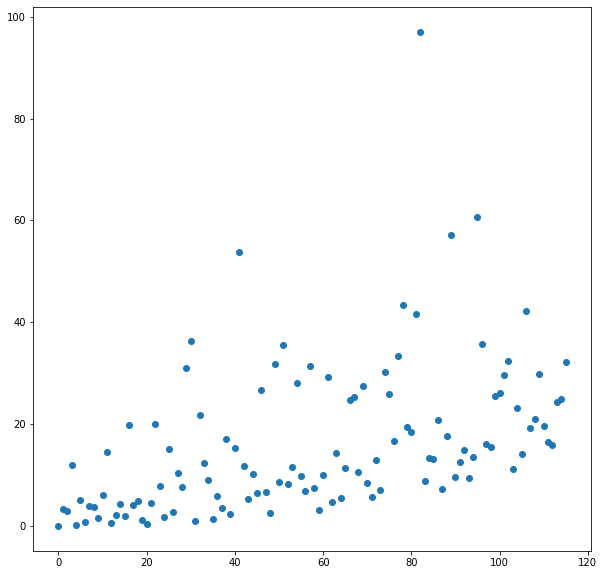

In [89]:
# On top we can see only a few of outliers, no action for now
plt.figure(figsize=(10, 10))
plt.scatter(np.arange(len(df_09_16["rainheight"].unique())), df_09_16["rainheight"].unique())

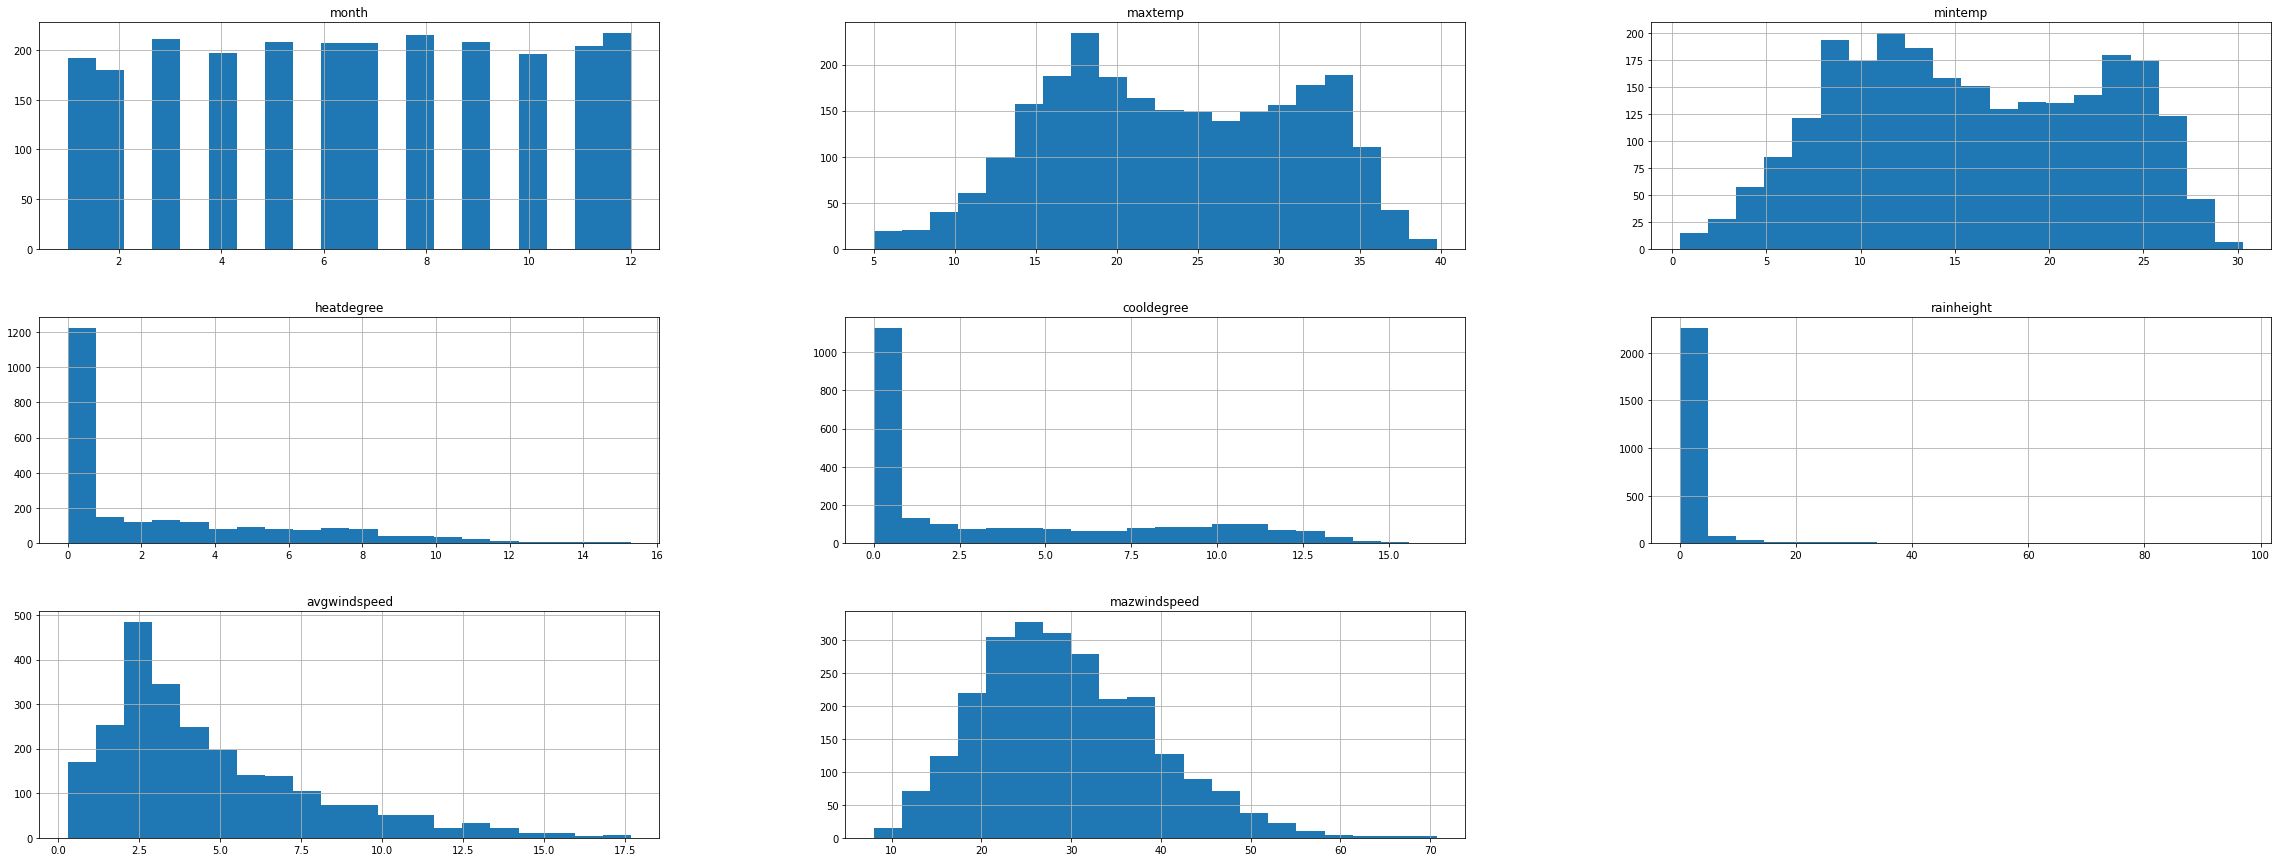

In [26]:
## In order to understand better how all the features are distributed we are going to visualize them using histplot
df_09_16.hist(figsize = (40,15), bins = 20)
plt.show()

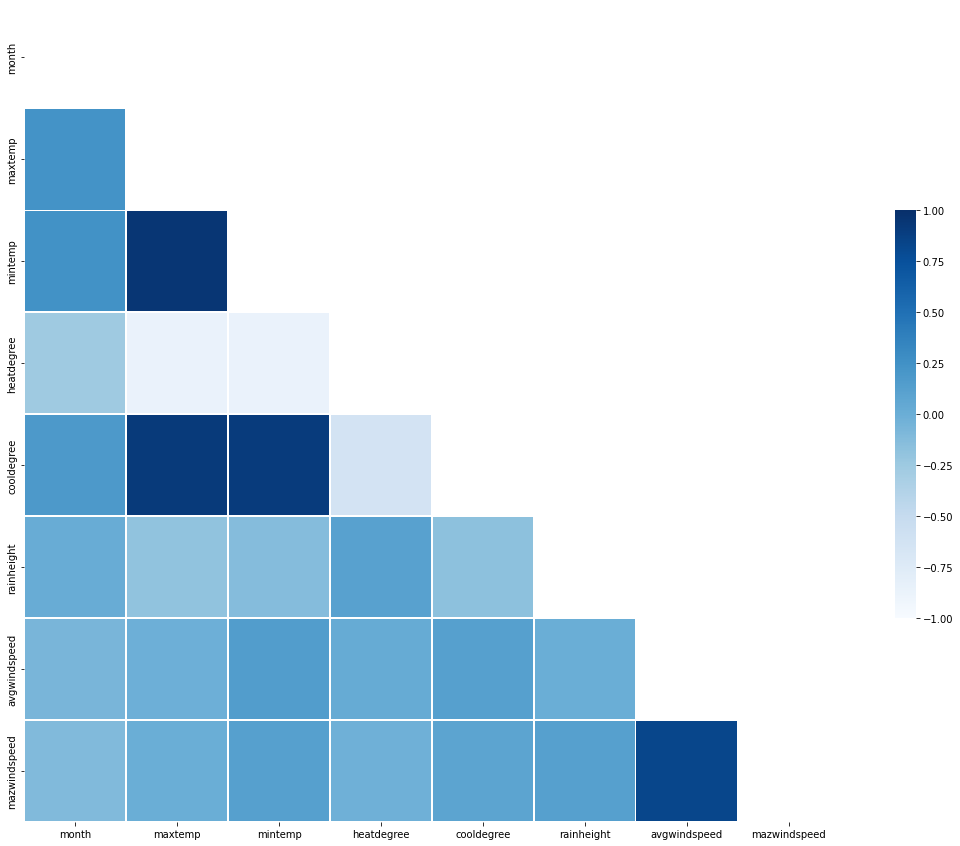

In [30]:
## heatmap
plt.figure(figsize=(20,15))
sns.heatmap(df_09_16.corr(), cmap="Blues",mask=np.triu(np.ones_like(df_09_16.corr(), dtype=bool)) , center=0, vmin=-1, vmax=1, square=True, linewidths=.5, cbar_kws={"shrink": .5})

To conclude for first dataset :

* There are no null values to impute
* All the values are numeric
* No duplicate values
* Values of column month are float and should be changed to integer
* Exists some outliers but for now we are going to continue with no actions

In [90]:
# change month to integer
df_09_16['month'] = df_09_16['month'].astype(int)
df_09_16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2442 entries, 0 to 2441
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   month         2442 non-null   int64  
 1   maxtemp       2442 non-null   float64
 2   mintemp       2442 non-null   float64
 3   heatdegree    2442 non-null   float64
 4   cooldegree    2442 non-null   float64
 5   rainheight    2442 non-null   float64
 6   avgwindspeed  2442 non-null   float64
 7   mazwindspeed  2442 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 152.8 KB


Check values for athens_2017.dat

In [91]:
# total rows and columns
df_17.shape

(365, 8)

In [92]:
## check values
df_17.head()

,month,maxtemp,mintemp,heatdegree,cooldegree,rainheight,avgwindspeed,mazwindspeed
0,1.0,10.0,4.0,11.6,0.0,0.0,1.8,16.1
1,1.0,12.8,1.9,10.9,0.0,0.0,0.6,14.5
2,1.0,15.3,4.6,8.7,0.0,0.0,1.1,24.1
3,1.0,15.5,5.7,7.3,0.0,0.2,1.8,24.1
4,1.0,17.1,7.7,5.3,0.0,0.0,4.2,43.5


In [93]:
df_17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   month         365 non-null    float64
 1   maxtemp       365 non-null    float64
 2   mintemp       365 non-null    float64
 3   heatdegree    365 non-null    float64
 4   cooldegree    365 non-null    float64
 5   rainheight    365 non-null    float64
 6   avgwindspeed  365 non-null    float64
 7   mazwindspeed  365 non-null    float64
dtypes: float64(8)
memory usage: 22.9 KB


In [94]:
# ckeck statistics
df_17.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
month,365.0,6.526027,3.452584,1.0,4.0,7.0,10.0,12.0
maxtemp,365.0,23.413425,7.943873,3.1,17.6,22.6,30.1,41.3
mintemp,365.0,15.295068,7.081568,-1.1,9.8,14.4,20.9,30.0
heatdegree,365.0,2.799452,3.670300,0.0,0.0,1.0,4.4,17.5
cooldegree,365.0,3.717534,4.622629,0.0,0.0,1.1,6.9,16.9
rainheight,365.0,1.293151,5.336200,0.0,0.0,0.0,0.0,54.0
avgwindspeed,365.0,4.267945,3.069504,0.5,2.1,3.2,6.0,16.1
mazwindspeed,365.0,28.154795,9.237035,9.7,20.9,27.4,35.4,51.5


In [95]:
# search for missing values -- no missing values
df_17.isna().sum().values

array([0, 0, 0, 0, 0, 0, 0, 0])

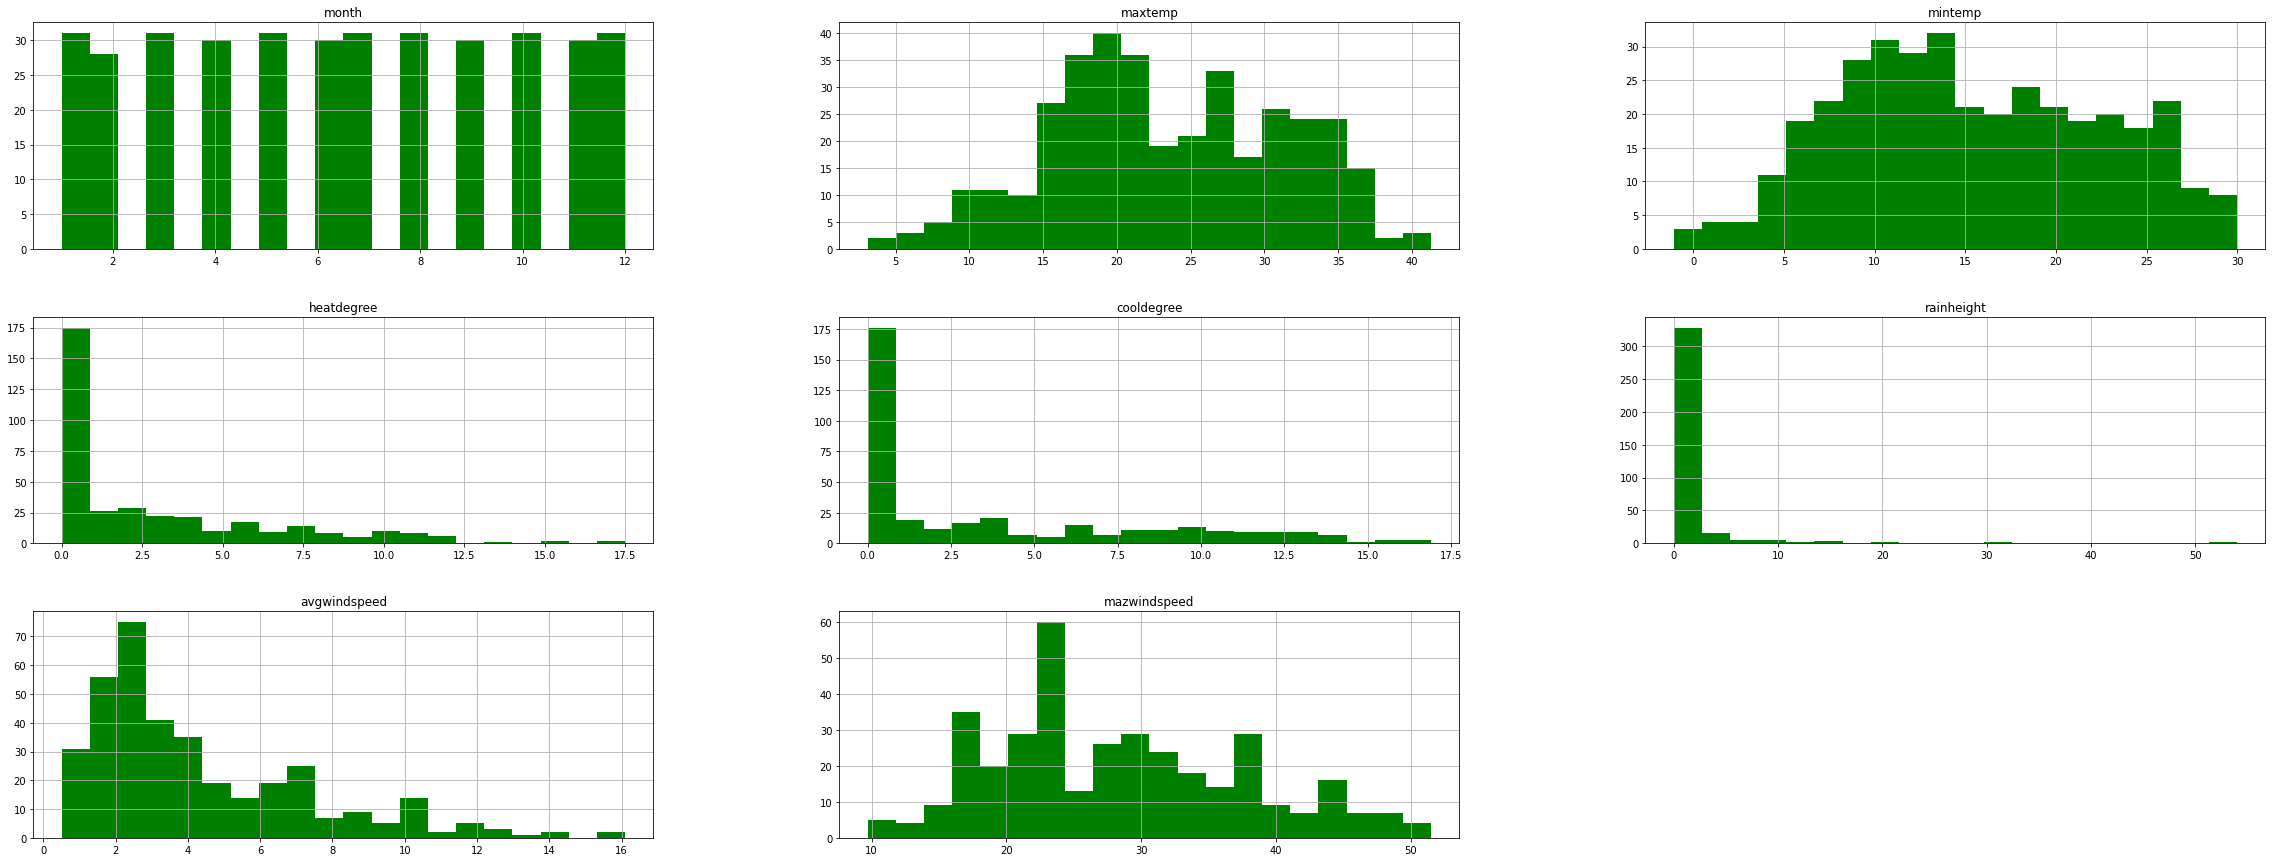

In [96]:
## In order to understand better how all the features are distributed we are going to visualize them using histplot
df_17.hist(color = "green",figsize = (40,15), bins = 20)
plt.show()

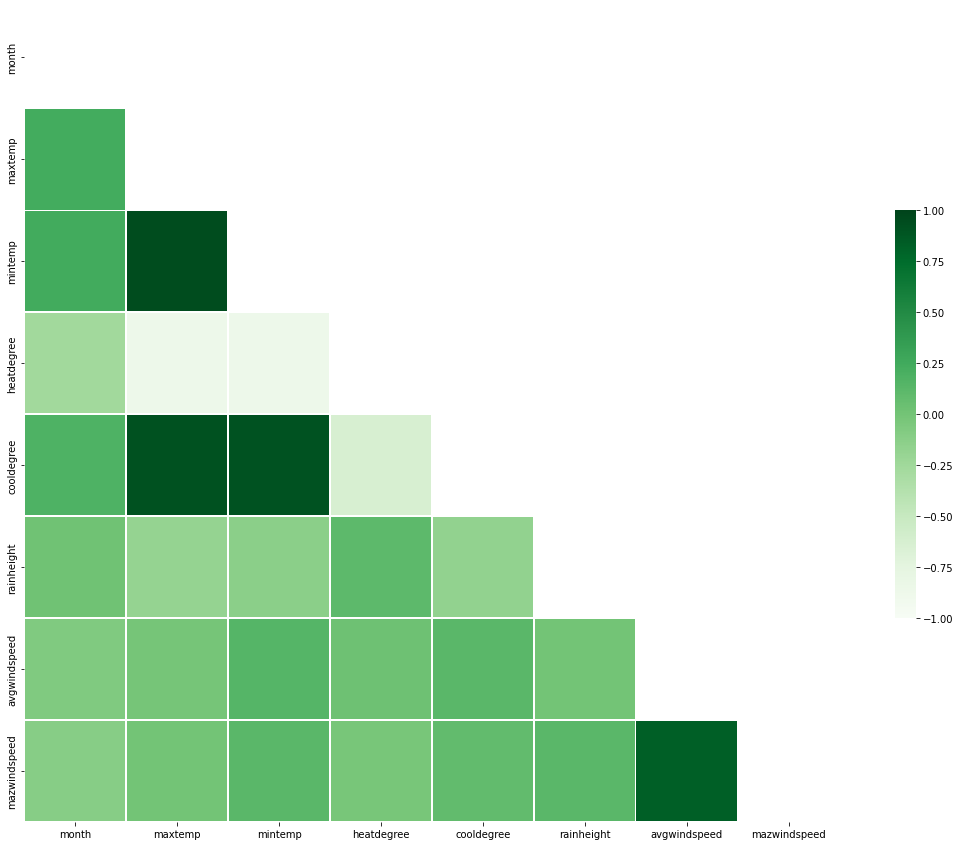

In [97]:
## heatmap
plt.figure(figsize=(20,15))
sns.heatmap(df_09_16.corr(), cmap="Greens",mask=np.triu(np.ones_like(df_09_16.corr(), dtype=bool)) , center=0, vmin=-1, vmax=1, square=True, linewidths=.5, cbar_kws={"shrink": .5})

To conclude for second dataset :

* There are no null values to impute
* All the values are numeric
* No duplicate values
* Values of column month are float and should be changed to integer

In [98]:
# change month to integer
df_17['month'] = df_17['month'].astype(int)
df_17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   month         365 non-null    int64  
 1   maxtemp       365 non-null    float64
 2   mintemp       365 non-null    float64
 3   heatdegree    365 non-null    float64
 4   cooldegree    365 non-null    float64
 5   rainheight    365 non-null    float64
 6   avgwindspeed  365 non-null    float64
 7   mazwindspeed  365 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 22.9 KB


# Requested exercise -> 1a
Creation of models in order to predict rain heigth (without using month feature)<br>
We will use RandomForestRegressor and XGBRegressor. <br>
The results are measured by Mean Absolute Error(MSE).<br><br>
MSE is used to check how close estimates or forecasts are to actual values. Lower the MSE, the closer is forecast to actual. This is used as a model evaluation measure for regression models and the lower value indicates a better fit.

In [160]:
# import for models and metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import StandardScaler

from time                    import time
import xgboost as xgb
from xgboost                 import XGBClassifier
from xgboost                 import XGBRegressor
from sklearn.svm             import SVC
from sklearn.ensemble        import RandomForestRegressor
from sklearn.ensemble        import RandomForestClassifier
from imblearn.pipeline       import Pipeline
from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### Split to tran and test 80 - 20 %

In [146]:
 # Split dataset to 70% - 30%
x = df_09_16.drop(columns=['month','rainheight'])
y = df_09_16['rainheight']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1953, 6), (1953,), (489, 6), (489,))

###Create functions for the models, for the visualization and the comparison of results
We will also standard scaler in order to get better results as all the features are float type


In [147]:
# function to run method
def model_execution(model, model_name):
  
  pipe = Pipeline(steps= [ ('standardscaler', StandardScaler()),
                           (model_name, model)])
  start = time()
  fitted_model = pipe.fit(X_train, y_train)
  end = time()
  runtime = round((end - start),4)
  print(f"{model_name} took {runtime} seconds or {round((runtime/60),4)} minutes to run.")
 
  return fitted_model, runtime

In [148]:
# function to fit the model
def model_prediction(fitted_model, x_feat):
  
  pred = fitted_model.predict(x_feat)
  return pred

In [149]:
# function in order to plot the roc_curve
def eval_classification (y_pred, y_true, x_data, model_name, train_test):

  fpr, tpr, thresholds = roc_curve(y_true, y_pred, pos_label=1)
  print(f''' {model_name} for {train_test} Data FPR {fpr} TPR {tpr}''')

  f, (ax0, ax1) = plt.subplots(1,2, figsize=(10,5))
  RocCurveDisplay.from_predictions(y_true, y_pred, ax=ax0, name=f'{model_name} {train_test} ROC_Curve')
  PrecisionRecallDisplay.from_predictions(y_true, y_pred, ax=ax1, name=f'{model_name} {train_test} Precision/Recall')
  plt.show()
  return

In [155]:
# function for the scores 
def model_evaluation_regressor (y_true, y_pred, model_name, train_test):

  df_score=pd.DataFrame({ 
                   'model_name'  : [model_name, model_name]
                  , 'type'       : [train_test, train_test]
                  ,'metric_name' : ['Mean_Squared_Error', 'R2 Score'] 
                  , 'metric'     : [
                                    round(mean_squared_error(y_true, y_pred), 4)
                                  , round(r2_score(y_true, y_pred) , 4)
                                  ]
  })
  display(df_score)
  return df_score

### Implementation of models

###Random Forest

In [159]:
#  Random Forest model run
RFC_model, RFC_runtime = model_execution(RandomForestRegressor(), 'RandomForest')
train_pred_RFC = model_prediction(RFC_model, X_train)
test_pred_RFC  = model_prediction(RFC_model, X_test)

# Random Forest Evaluation
print("\n")
RFC_train = model_evaluation_regressor(y_train, train_pred_RFC, 'RFC', 'Train')
print("\n")
RFC_test = model_evaluation_regressor(y_test, test_pred_RFC,'RFC', 'Test')


RandomForest took 0.8557 seconds or 0.0143 minutes to run.




,model_name,type,metric_name,metric
0,RFC,Train,Mean_Squared_Error,2.7983
1,RFC,Train,R2 Score,0.8738


,model_name,type,metric_name,metric
0,RFC,Test,Mean_Squared_Error,42.1728
1,RFC,Test,R2 Score,0.0839


###XGBoost

In [161]:
# XGBoost run 
XGB_model, XGB_runtime = model_execution(XGBRegressor(), 'XGBClassifier')
train_pred_XGB = model_prediction(XGB_model, X_train)
test_pred_XGB  = model_prediction(XGB_model, X_test)

# XGBoost Evaluation
XGB_train = model_evaluation_regressor(y_train, train_pred_XGB, 'XGB', 'Train')
print("\n")
XGB_test = model_evaluation_regressor(y_test, test_pred_XGB,'XGB', 'Test')

[10:23:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBClassifier took 0.1943 seconds or 0.0032 minutes to run.


,model_name,type,metric_name,metric
0,XGB,Train,Mean_Squared_Error,11.7431
1,XGB,Train,R2 Score,0.4706


,model_name,type,metric_name,metric
0,XGB,Test,Mean_Squared_Error,43.0064
1,XGB,Test,R2 Score,0.0658


####Results on test set from 2009-2016
As we can see from the results Random Forest Regressor is better from XGB Regressor , but both not so good at test set as the Mean Square Error is big enough (> 25.5 )

To continue with, lets fit to model as test the data from athens_2017.*dat*

In [187]:
test_17 = df_17.drop(columns=['month','rainheight'])
test_17_rain = df_17['rainheight']

###Random Forest

In [191]:
#  Random Forest model run
test_17_pred_RFC  = model_prediction(RFC_model, test_17)

# Random Forest Evaluation
print("\n")
RFC_test_2017 = model_evaluation_regressor(test_17_rain, test_17_pred_RFC, 'RFC', 'Test')

,model_name,type,metric_name,metric
0,RFC,Test,Mean_Squared_Error,29.6656
1,RFC,Test,R2 Score,-0.0447


###XGBoost

In [192]:
# XGBoost run 
test_17_pred_XGB  = model_prediction(XGB_model, test_17)

# XGBoost Evaluation
print("\n")
XGB_test_2017 = model_evaluation_regressor(test_17_rain, test_17_pred_XGB, 'XGB', 'Test')

,model_name,type,metric_name,metric
0,XGB,Test,Mean_Squared_Error,27.1387
1,XGB,Test,R2 Score,0.0443


####Results on test set from 2017
As we can see from the results XGB Regressor is better from Random Forest Regressor <br>
Both have similar Mean Square Error which is closest to zero than test set of 2009-2016 , show it works better on this test set <br> 
But the R2 Score of Random Forest which is negative tell us that it is bad fit or has extreme bad prediction, so the best is to not take it under consideration. 